In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# create synthethic data set
X, y = make_classification(random_state=1)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# train classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

In [2]:
from sklearn.metrics import confusion_matrix

# y_pred are our model's predictions
display(confusion_matrix(y_test, y_pred))

array([[12,  1],
       [ 2, 10]])

In [3]:
from sklearn.metrics import accuracy_score

# compute accuracy score of the classifier for the test data
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print('accuracy: {:.2f}'.format(acc))

accuracy: 0.88


In [4]:
from fairlearn.metrics import (false_positive_rate, true_negative_rate,
                               true_positive_rate, false_negative_rate)

# compute misclassification rates of the classifier for the test data
fpr = false_positive_rate(y_true=y_test, y_pred=y_pred)
tnr = true_negative_rate(y_true=y_test, y_pred=y_pred)
fnr = false_negative_rate(y_true=y_test, y_pred=y_pred)
tpr = true_positive_rate(y_true=y_test, y_pred=y_pred)

print("""
fpr: {:.2f}
tnr: {:.2f}
fnr: {:.2f}
tpr: {:.2f}
""".format(fpr, tnr, fnr, tpr))


fpr: 0.08
tnr: 0.92
fnr: 0.17
tpr: 0.83



In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

# compute misclassification rates of the classifier for the test data
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

print("""
precision: {:.2f}
recall:    {:.2f}
f1 score:  {:.2f}
""".format(precision, recall, f1))


precision: 0.91
recall:    0.83
f1 score:  0.87



In [6]:
def npv_score(y_true, y_pred, **kwargs):
    """
    NPV is not implemented in scikit-learn, but is the same as PPV (i.e., precision) 
    for the negative class.
    """
    return precision_score(y_true, y_pred, pos_label=0, **kwargs)

# compute misclassification rates of the classifier for the test data
ppv = precision_score(y_true=y_test, y_pred=y_pred)
npv = npv_score(y_true=y_test, y_pred=y_pred)

print("""
ppv: {:.2f}
npv: {:.2f}
""".format(ppv, npv))


ppv: 0.91
npv: 0.86



In [7]:
import matplotlib.pyplot as plt

# retrieve predicted classes
y_pred = clf.predict(X_test)
print('predicted classes: {}'.format(y_pred))

# print confidence scores instead of discrete predictions
print('confidence scores: {}'.format(clf.predict_proba(X_test)))

# retrieve confidence scores for the positive class
y_score = clf.predict_proba(X_test)[:, 1]
print('confidence scores positive class: {}'.format(y_score))

predicted classes: [0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1]
confidence scores: [[0.95318273 0.04681727]
 [0.99617159 0.00382841]
 [0.02117635 0.97882365]
 [0.97583057 0.02416943]
 [0.0332806  0.9667194 ]
 [0.02815556 0.97184444]
 [0.30326393 0.69673607]
 [0.66935727 0.33064273]
 [0.91678782 0.08321218]
 [0.03950548 0.96049452]
 [0.92708598 0.07291402]
 [0.99829629 0.00170371]
 [0.70518227 0.29481773]
 [0.63641324 0.36358676]
 [0.2251617  0.7748383 ]
 [0.18185178 0.81814822]
 [0.97925552 0.02074448]
 [0.06003966 0.93996034]
 [0.25534451 0.74465549]
 [0.9880332  0.0119668 ]
 [0.01421573 0.98578427]
 [0.87356955 0.12643045]
 [0.96832768 0.03167232]
 [0.99022228 0.00977772]
 [0.03662168 0.96337832]]
confidence scores positive class: [0.04681727 0.00382841 0.97882365 0.02416943 0.9667194  0.97184444
 0.69673607 0.33064273 0.08321218 0.96049452 0.07291402 0.00170371
 0.29481773 0.36358676 0.7748383  0.81814822 0.02074448 0.93996034
 0.74465549 0.0119668  0.98578427 0.12643045 0.03

ROC-AUC: 0.94


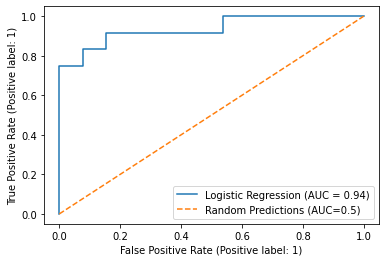

In [8]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# compute area under the ROC curve
roc_auc = roc_auc_score(y_true=y_test, y_score=y_score)
print('ROC-AUC: {:.2f}'.format(roc_auc))

# plot ROC curve from predictions
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_score, name='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle="--", label='Random Predictions (AUC=0.5)')
plt.legend()
plt.show()

average precision: 0.95


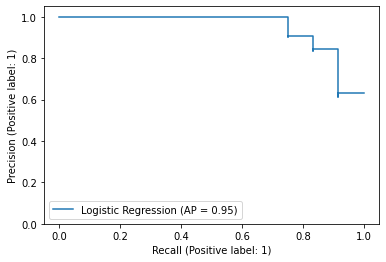

In [9]:
from sklearn.metrics import average_precision_score, PrecisionRecallDisplay

# compute average precision
avg_precision = average_precision_score(y_true=y_test, y_score=y_score)
print('average precision: {:.2f}'.format(avg_precision))

# plot precision-recall curve
PrecisionRecallDisplay.from_predictions(y_true=y_test, y_pred=y_score, name='Logistic Regression')
plt.ylim(0,1.05)
plt.show()

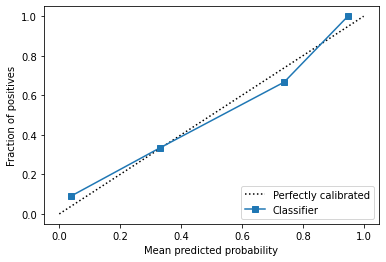

In [10]:
from sklearn.calibration import CalibrationDisplay

# plot calibration curve
disp = CalibrationDisplay.from_predictions(y_true=y_test, y_prob=y_score)
plt.show()

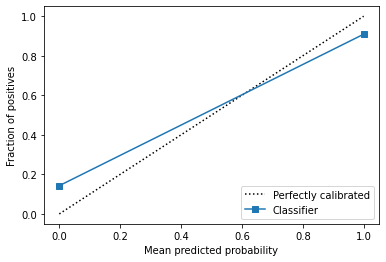

In [11]:
# plot calibration curve for classifications
disp = CalibrationDisplay.from_predictions(y_true=y_test, y_prob=y_pred)
plt.show()